In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# import some libraries
import pandas as pd
import numpy as np
import random
random.seed(4)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")


Setup Complete


In [4]:
raw_data=pd.read_csv('train.csv')
raw_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
stores_data=pd.read_csv('stores.csv')
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
# feature data 
feature_data=pd.read_csv('features.csv')
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
# Merge one table with another. merge all the data together
df= raw_data.merge(stores_data, on='Store')
display(df.head())
# merge this data to feature data
features_col=['Store','Date','Temperature','Fuel_Price','CPI','Unemployment']
df=df.merge(feature_data[features_col],on= ['Store','Date'])
display(df.head())


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106


## EDA

In [10]:
# description of numeric columns
df.describe(include='number')

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
df.describe(include='object')

,Date,Type
count,421570,421570
unique,143,3
top,2011-12-23,A
freq,3027,215478


In [13]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [14]:
# fix the datatypes and create some new columns
df['Store']=df['Store'].astype(str)
df['Dept']=df['Dept'].astype(str)
# Conver Date to datetime and add a new column month
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month

In [15]:
df.dtypes

Store                   object
Dept                    object
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Month                    int32
dtype: object

In [16]:
# check if there is any missing value
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
dtype: int64

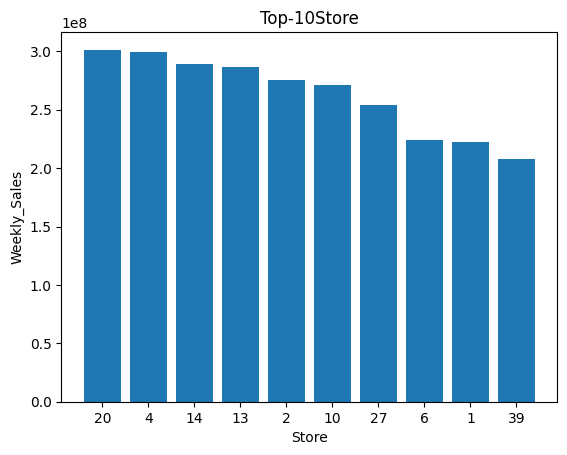

In [17]:
# Plot the weekly sales with store
top_n = 10
x_col = 'Store'
y_col = 'Weekly_Sales'
# create a frequency table  for the product column
table= df.groupby(x_col)[y_col].sum().sort_values(ascending=False)

# create a bar chart
plt.bar(table.index[:top_n],table.values[:top_n])

# Set the title ans labels
plt.title(f'Top-{min(top_n,len(table.index))}{x_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

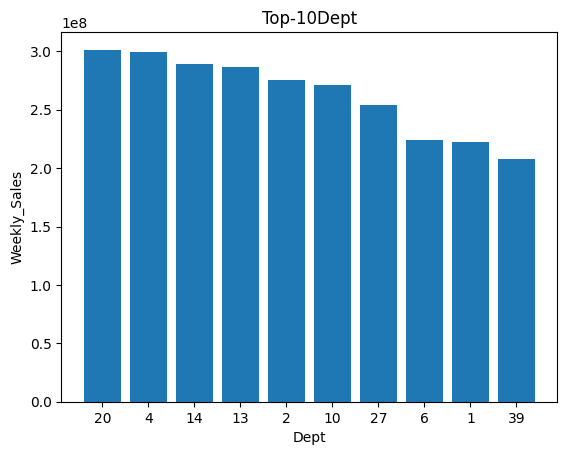

In [18]:
# Plot the weekly sales with store
top_n = 10
x_col = 'Dept'
y_col = 'Weekly_Sales'
# create a frequency table  for the product column
table1= df.groupby(x_col)[y_col].sum().sort_values(ascending=False)

# create a bar chart
plt.bar(table.index[:top_n],table.values[:top_n])

# Set the title ans labels
plt.title(f'Top-{min(top_n,len(table.index))}{x_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

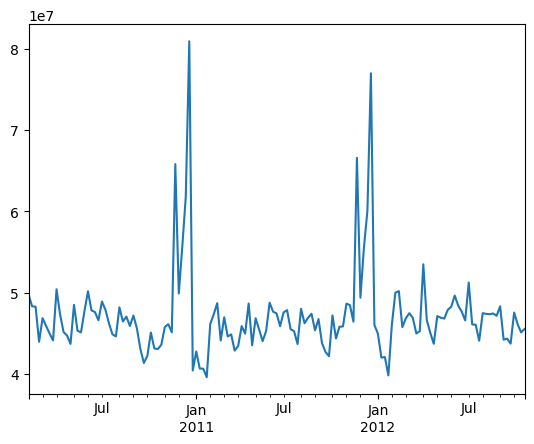

In [19]:
# Weekly sales on line chart
data=df.groupby('Date')["Weekly_Sales"].sum()
data.plot()
plt.xlabel(None)
plt.show()

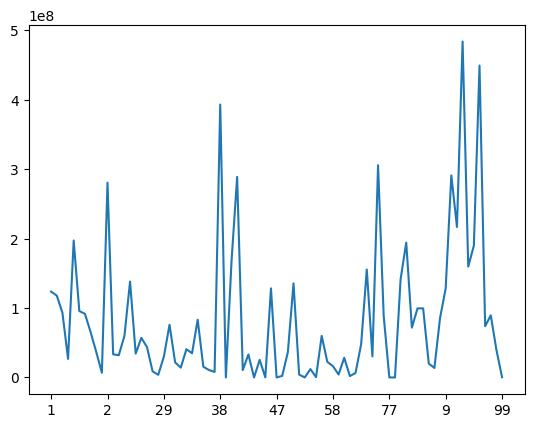

In [20]:
data1=df.groupby('Dept')['Weekly_Sales'].sum()
data1.plot()
plt.xlabel(None)
plt.show()

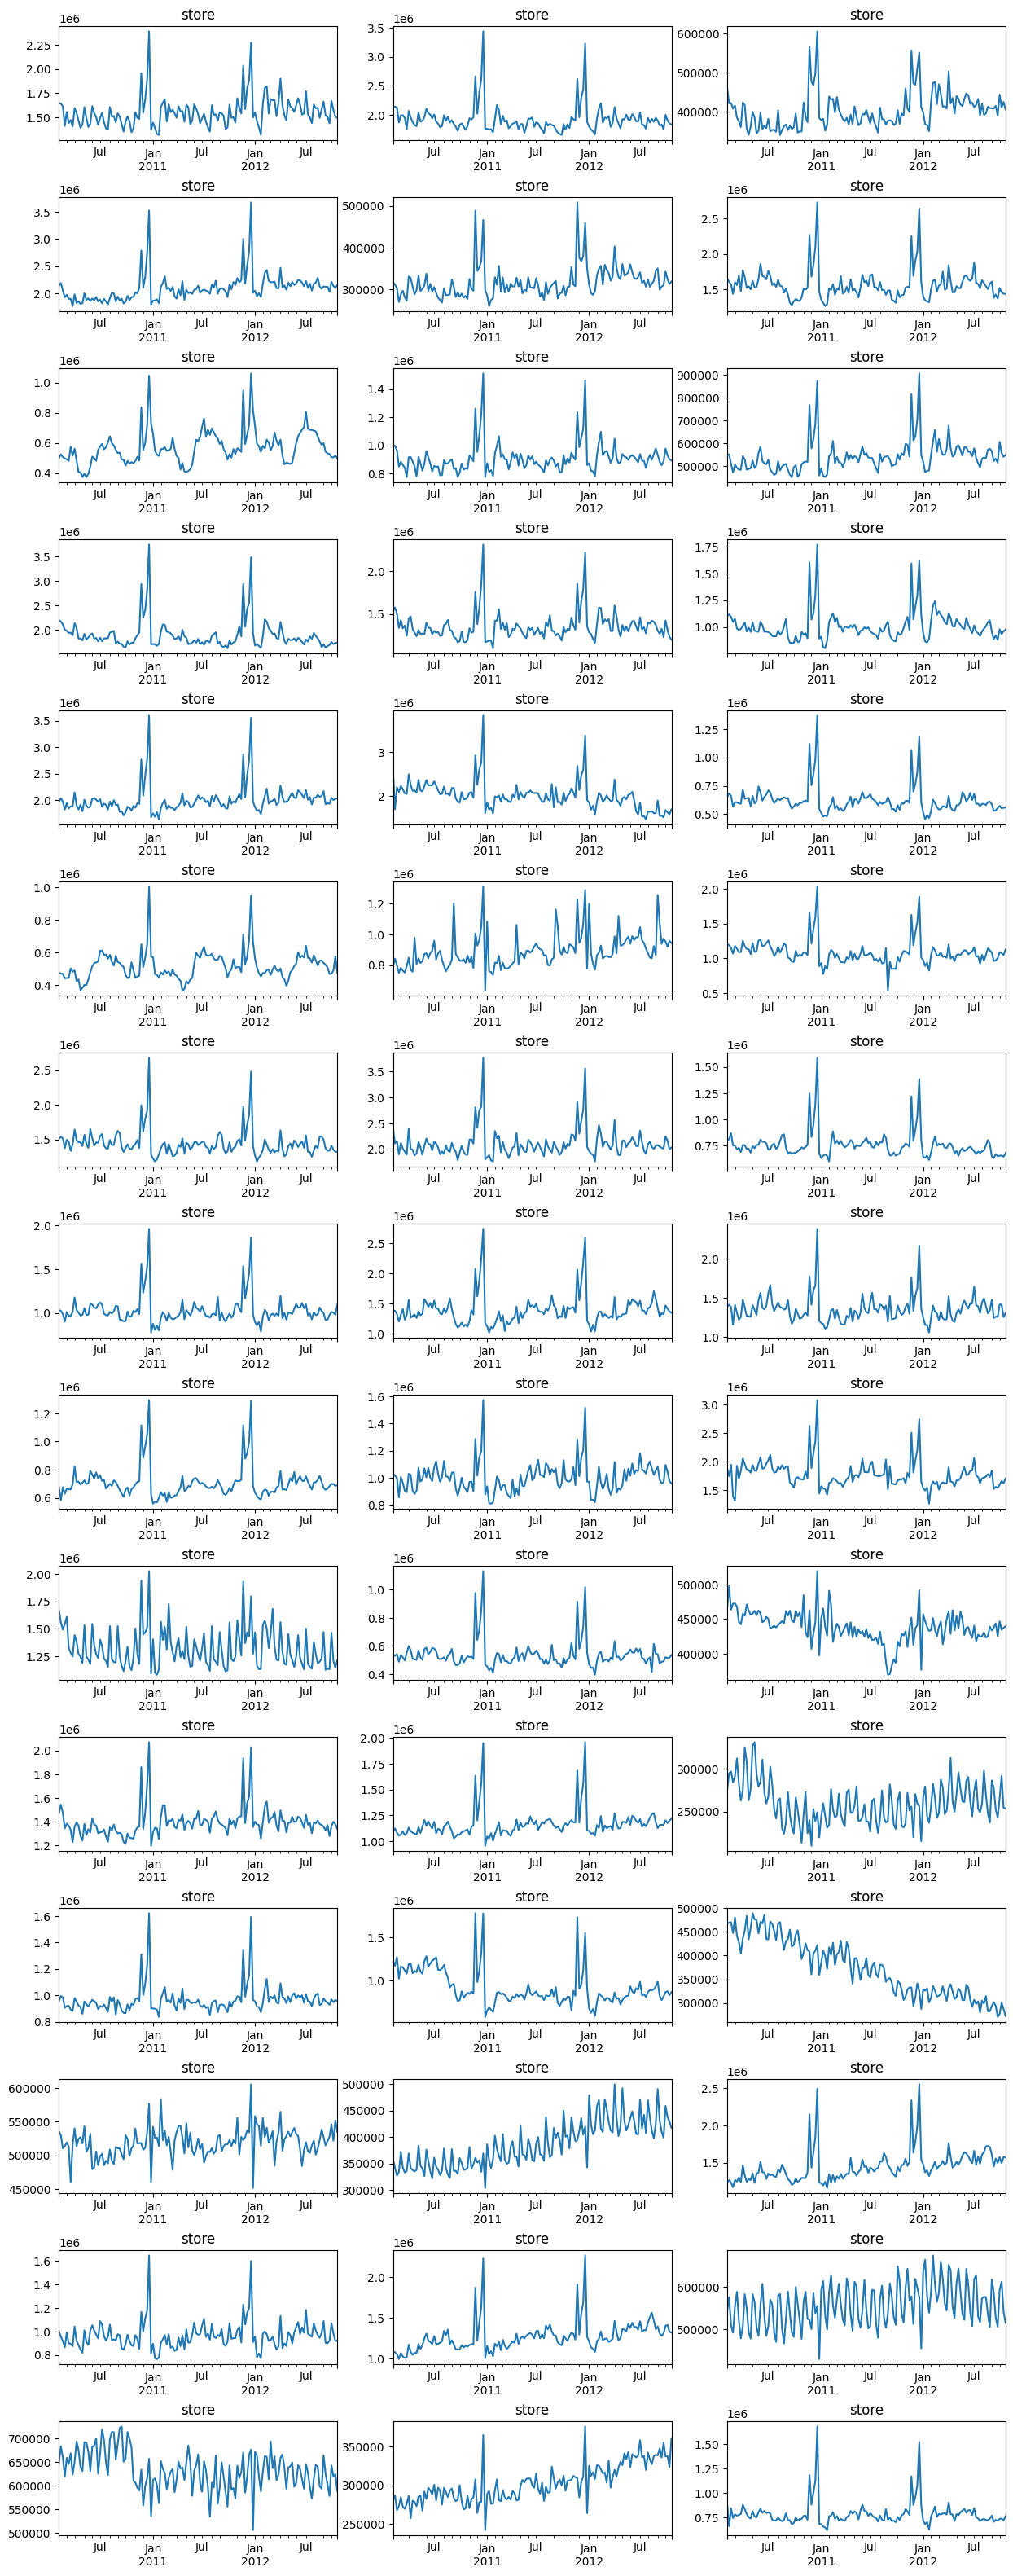

In [21]:
# Storewise Sales Line plot
plt.figure(figsize=(15,40))
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

for store,store_data in df.groupby('Store'):
    data=store_data.groupby('Date')['Weekly_Sales'].sum()
    plt.subplot(15,3, int(store))
    data.plot()
    plt.title('store')
    plt.xlabel(None)
    
plt.show()